# Dependency

In [489]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb # datareader supports multiple financial database including yahoo and google
import datetime
from dateutil.relativedelta import relativedelta
import GetOldTweets3 as tws
import tweepy
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels
from scipy import stats
import math
import arch
from statsmodels.stats.diagnostic import acorr_ljungbox

# Data Source
## Start & End Date

In [365]:
date_rang_month = 3
start_date = datetime.date.today() + relativedelta(months=-date_rang_month)
end_date = datetime.date.today()

## TESLA Stock

In [372]:
tsla_df = pd.DataFrame(wb.DataReader("TSLA", 
                                    data_source = "yahoo", 
                                    start = start_date, 
                                    end = end_date))
tsla_df = tsla_df.dropna()
tsla_df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-31,500.140015,440.109985,444.609985,498.320007,118374400.0,498.320007
2020-09-01,502.489990,470.510010,502.140015,475.049988,90119400.0,475.049988
2020-09-02,479.040009,405.119995,478.989990,447.369995,96176100.0,447.369995
2020-09-03,431.799988,402.000000,407.230011,407.000000,87596100.0,407.000000
2020-09-04,428.000000,372.019989,402.809998,418.320007,110321900.0,418.320007


## Dow Jones Index Average

In [367]:
djia_df = pd.DataFrame(wb.DataReader("DJIA", 
                                     data_source = "fred",
                                     start = start_date + relativedelta(days = -1), # due to fred database's specialty, we should set the start date one day before the actual start date.
                                     end = end_date))
djia_df = djia_df.dropna()
djia_df.head(5)

,DJIA
DATE,
2020-08-31,28430.05
2020-09-01,28645.66
2020-09-02,29100.50
2020-09-03,28292.73
2020-09-04,28133.31


## Federal Funds Rate  

In [368]:
dff_df = pd.DataFrame(wb.DataReader("DFF", 
                                    data_source = "fred",
                                    start = start_date + relativedelta(days = -1), # due to fred database's specialty, we should set the start date one day before the actual start date.
                                    end = end_date))
dff_df = dff_df.dropna()
dff_df.head(5)

,DFF
DATE,
2020-08-29,0.09
2020-08-30,0.09
2020-08-31,0.09
2020-09-01,0.09
2020-09-02,0.09


## Panasonic Corp. Stock

In [369]:
pcrfy_df = pd.DataFrame(wb.DataReader("PCRFY", 
                                      data_source = "yahoo", 
                                      start = start_date, 
                                      end = end_date))
pcrfy_df = pcrfy_df.dropna()
pcrfy_df.head(5)

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Read timed out.

## BMW Stock

In [ ]:
bwm_df = pd.DataFrame(wb.DataReader("BMW.DE", 
                                    data_source = "yahoo", 
                                    start = start_date, 
                                    end = end_date))
bwm_df = bwm_df.dropna()
bwm_df.head(5)

## Daimler AG Stock

In [ ]:
dai_df = pd.DataFrame(wb.DataReader("DAI.DE", 
                                    data_source = "yahoo", 
                                    start = start_date, 
                                    end = end_date))
dai_df = dai_df.dropna()
dai_df.head(5)

## XPeng Inc. Stock

In [ ]:
xpev_df = pd.DataFrame(wb.DataReader("XPEV", 
                                    data_source = "yahoo", 
                                    start = start_date, 
                                    end = end_date))
xpev_df = xpev_df.dropna()
xpev_df.head(5)

## BYD Company Limited Stock

In [ ]:
byddf_df = pd.DataFrame(wb.DataReader("BYDDF", 
                                    data_source = "yahoo", 
                                    start = start_date, 
                                    end = end_date))
byddf_df = byddf_df.dropna()
byddf_df.head(5)

## Brent Crude Oil Last Day Financ

In [ ]:
oil_df = pd.DataFrame(wb.DataReader("BZ=F", 
                                    data_source = "yahoo", 
                                    start = start_date,
                                    end = end_date))
oil_df = oil_df.dropna()
oil_df.head(5)

## Number of Tesla vehicles delivered worldwide 

In [ ]:
quaters = [
    (r'q2', r'2019'),
    (r'q3', r'2019'),
    (r'q4', r'2019'),
    (r'q1', r'2020'),
    (r'q2', r'2020'),
    (r'q3', r'2020')
]

deliver_df = list()
for q, year in quaters:
    url = r'https://ir.tesla.com/press-release/tesla-' + q + r'-' + year + r'-vehicle-production-deliveries'
    tables = pd.read_html(url)
    tmp = list()
    for row in range(1,4):
        for col in range(1, 3):
            if q == r'q2' and year == r'2019':
                tmp.append(tables[0].iloc[row, col + 1])
            else:
                tmp.append(tables[0].iloc[row, col])
    deliver_df.append(tmp)
deliver_df = pd.DataFrame(deliver_df,
                          columns= [
                              "Production Model S/X",
                              "Deliveries Model S/X",
                              "Production Model 3",
                              "Deliveries Model 3",
                              "Production Total",
                              "Deliveries Total",
                         ])
deliver_df
    

## Tesla Revenue

In [ ]:
revenue_df = pd.read_html(r'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue')
revenue_df = revenue_df[1]
revenue_df.dropna(how = "any")
revenue_df.head(5)

# Data Cleaning

Currently, the data used includes:

1. Tesla Stock `tsla_df`
2. Dow Jones Index Average `djia_df`
3. Federal Funds Rate `dff_df`
4. Panasonic Corp. Stock `pcrfy_df`
5. BMW Stock `bwm_df`
6. Daimler AG Stock `dai_df`
7. XPeng Inc. Stock `xpev_df`
8. BYD Company Limited Stock `byddf_df`
9. Brent Crude Oil Last Day Financ `oil_df`
10. Number of Tesla vehicles delivered worldwide `deliver_df`
11. Tesla Revenue `revenue_df`

Actually, in the last section, we have done a bit of data Cleaning, like

1. drop nan/missing values 
2. reset the index of dataframe to include `date` as one column in the dataframe

However, we still need to do more:

1. Renaming columns to a more recognizable set of labels 
2. Dropping unnecessary columns in a DataFrame
3. do some more modification on `deliver_df` and `revenue_df`
4. Combine all these dataframe to a complete DataFrame

## Clean `revenue_df`

In [ ]:
# rename the dataframe
revenue_df.columns = ["Date", "Tesla Quarterly Revenue(Millions of US $)"]

# drop rows with missing values
for col in revenue_df.columns:
    if np.sum(revenue_df[col].isna()) != 0:
        print("WARNING: for revenue_df, column: " + col + " appears missing values")
        revenue_df = revenue_df[revenue_df[col].notna()]

# transfer data type of "Date" from string to TimeStamp
revenue_df["Date"] = revenue_df["Date"].map(pd.Timestamp)

# transfer data type of "Tesla Quarterly Revenue(Millions of US $)" from string to decimal
def doller2decimal(target):
    return float(target.replace(",", "").replace("$", ""))
revenue_df["Tesla Quarterly Revenue(Millions of US $)"] = revenue_df["Tesla Quarterly Revenue(Millions of US $)"].apply(doller2decimal)

# reorder the revenue_df to ascending order by Date
revenue_df = revenue_df.sort_values(by = ["Date"], ascending = True)

revenue_df.tail(5)


## Clean `deliver_df`

In [ ]:
# add "Date" to the dataframe deliver_df
deliver_df["Date"] = revenue_df["Date"][-len(deliver_df):].reset_index()["Date"]
deliver_df = deliver_df[deliver_df.columns.to_list()[-1:] + deliver_df.columns.to_list()[:-1]] # reorder the columns

deliver_df

In [374]:
# Combine all the daily data to one dataframe
index_rate_df=pd.concat([djia_df,dff_df],axis=1)
compete_company_stock_df=pd.concat([bwm_df,dai_df],axis=1)
compete_company_stock_df.columns=['BMW High','BMW Low','BMW Open','BMW Close','BMW Volume','BMW Adj Close',
                               'Daimler High','Daimler Low','Daimler Open','Daimler Close','Daimler Volume','Daimler Adj Close']
other_electric_stock_df= pd.concat([xpev_df,byddf_df],axis=1)
other_electric_stock_df.columns=['XPeng High','Xpeng Low','Xpeng Open','Xpeng Close','Xpeng Volume','Xpeng Adj Close',
                               'BYD High','BYD Low','BYD Open','BYD Close','BYD Volume','BYD Adj Close']
total_df=pd.concat([tsla_df,compete_company_stock_df,other_electric_stock_df,index_rate_df],axis=1)
tesla_close_df=tsla_df.iloc[:, [3]]
tesla_close_df

,Close
Date,
2020-08-31,498.320007
2020-09-01,475.049988
2020-09-02,447.369995
2020-09-03,407.000000
2020-09-04,418.320007
...,...
2020-11-20,489.609985
2020-11-23,521.849976
2020-11-24,555.380005


In [ ]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(tesla_close_df, label = "Tesla stock close price")
plt.legend()
plt.savefig("Tesla.png")

In [ ]:
# test if the series data is Stationary
# Using the adfuller test
def isSeriesStationary(series):
    pValue = adfuller(series)[1]
    if pValue > 0.05:
        return False
    else:
        return True
    
def isSeriesStationaryAvg(series, delta = 2):
    split = int(len(series)/2)
    split1, split2 = series[:split], series[split:]
    avg1, avg2 = split1.mean(), split2.mean()
    var1, var2 = split1.var(), split2.var()
    if abs(avg1 - avg2) > delta or abs(var1 - var2) > delta**2:
        return False
    else:
        return True

In [ ]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    print(history[-interval])
    return yhat + history[-interval]

def describeSeries(data, label):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data, label = "Series")
    plt.plot(data.rolling(2).mean(), '--', label = "Rolling mean")
    plt.plot(data.rolling(2).std(), ":", label = "Rolling Std")
    plt.legend()
    plt.savefig(label)

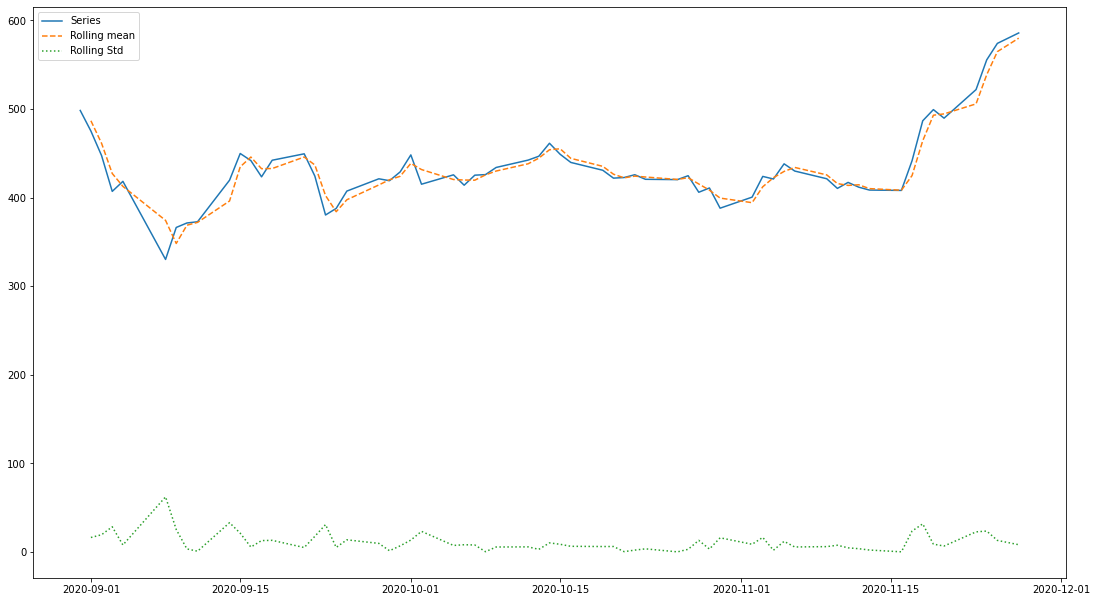

In [375]:
describeSeries(tesla_close_df, "Describe Stock Close Price.png")

In [376]:
isSeriesStationaryAvg(tesla_close_df['Close'].values)

False

In [ ]:
def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries,period=20)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

In [ ]:
decomposing(tesla_close_df)

In [ ]:
def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()
    

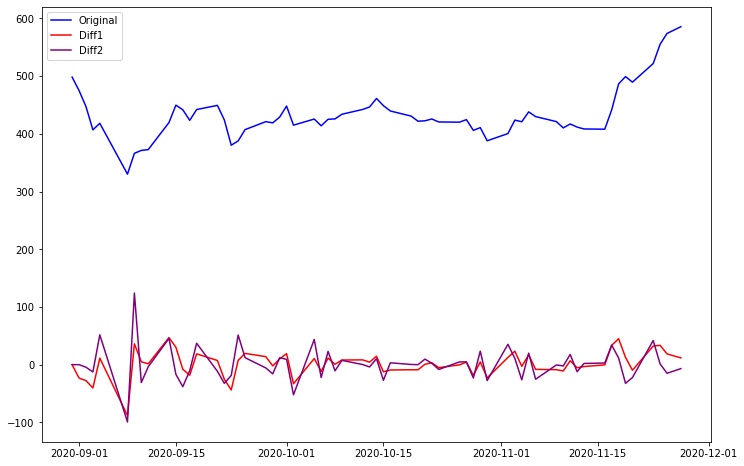

In [377]:
diff(tesla_close_df)

In [381]:
tesla_diff_1=tesla_close_df.diff(1)
tesla_diff_1

,Close
Date,
2020-08-31,NaN
2020-09-01,-23.270020
2020-09-02,-27.679993
2020-09-03,-40.369995
2020-09-04,11.320007
...,...
2020-11-20,-9.660004
2020-11-23,32.239990
2020-11-24,33.530029


In [380]:
isSeriesStationaryAvg(tesla_diff_1['Close'].values)

True

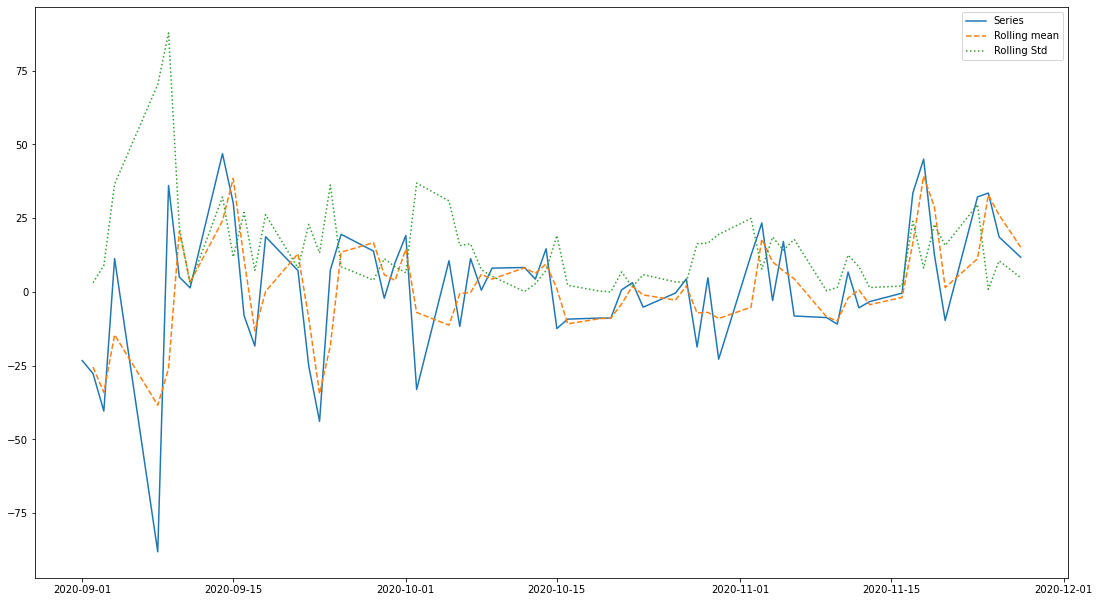

In [384]:
describeSeries(tesla_diff_1, "Describe differed data.png")

In [386]:
tesla_diff_1_times=tesla_close_df.diff(1)
tesla_diff_1_copy=tesla_diff_1_times
tesla_diff_1_copy['Close']=tesla_diff_1_copy['Close']+100
tesla_diff_1_copy

,Close
Date,
2020-08-31,NaN
2020-09-01,76.729980
2020-09-02,72.320007
2020-09-03,59.630005
2020-09-04,111.320007
...,...
2020-11-20,90.339996
2020-11-23,132.239990
2020-11-24,133.530029


In [387]:
tesla_diff_1_copy=tesla_diff_1_copy.dropna()
for i in range(len(tesla_diff_1_copy)):
    tesla_diff_1_copy.iat[i,0]=math.log(tesla_diff_1_copy.iat[i,0])
tesla_diff_1_copy

,Close
Date,
2020-09-01,4.340293
2020-09-02,4.281101
2020-09-03,4.088159
2020-09-04,4.712409
2020-09-08,2.475696
...,...
2020-11-20,4.503580
2020-11-23,4.884618
2020-11-24,4.894326


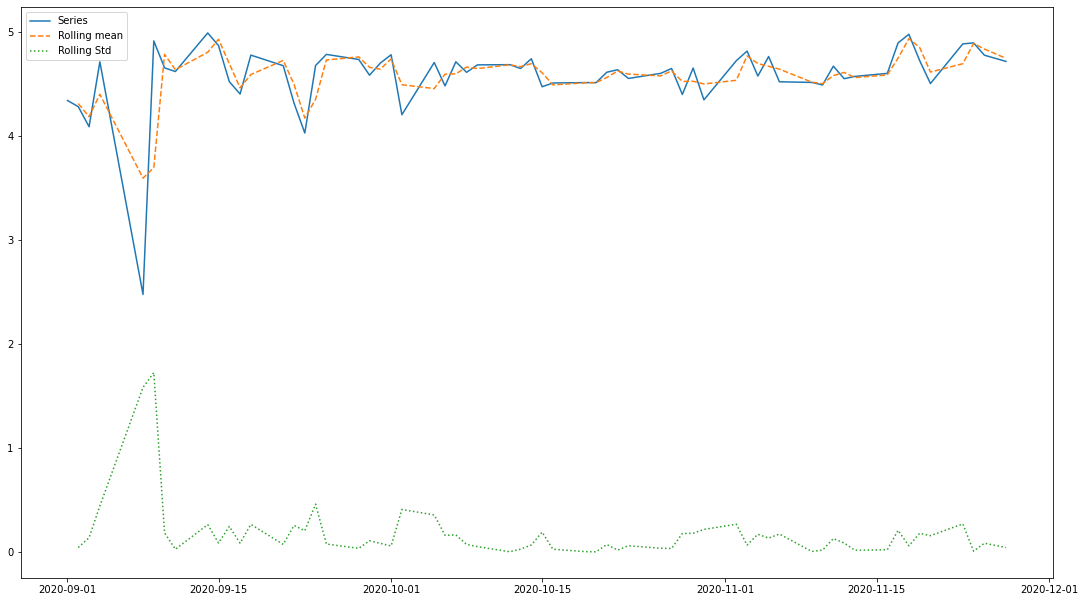

In [388]:
describeSeries(tesla_diff_1_copy, "Describe differed and log transformed data.png")

In [391]:
isSeriesStationaryAvg(tesla_diff_1_copy['Close'].values)

True

In [226]:
def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()   

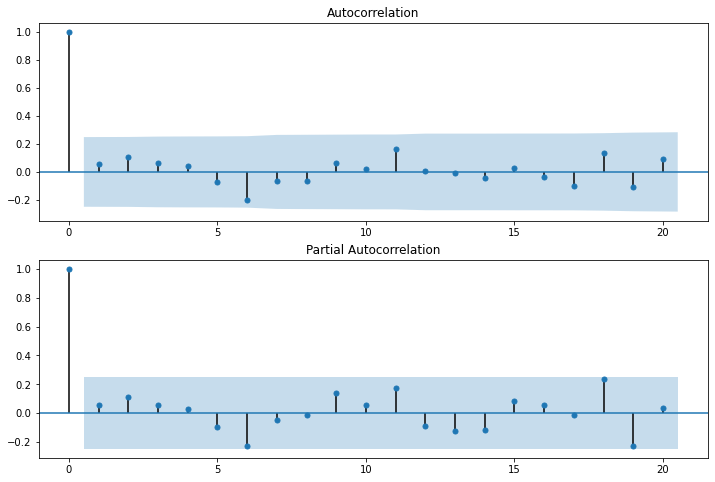

,Close
Date,
2020-09-01,-23.270020
2020-09-02,-27.679993
2020-09-03,-40.369995
2020-09-04,11.320007
2020-09-08,-88.110016
...,...
2020-11-20,-9.660004
2020-11-23,32.239990
2020-11-24,33.530029


In [393]:
tesla_diff_1=tesla_diff_1.dropna()
autocorrelation(tesla_diff_1, 20)
tesla_diff_1

In [320]:
def splitTrainTest(series, testSplit):
    totalData = len(series)
    trainSplit = int(totalData * (1 - testSplit))
    trainSet = series[:trainSplit]
    testSet = series[trainSplit:]
    return trainSet, testSet

In [440]:
trainSet_diff, testSet_diff = splitTrainTest(tesla_diff_1, 0.1)
trainSet_origin,testSet_origin =splitTrainTest(tesla_close_df, 0.1)
trainSet_diff.index = pd.DatetimeIndex(trainSet_diff.index).to_period('D')
testSet_diff.index = pd.DatetimeIndex(testSet_diff.index).to_period('D')
trainSet_origin

,Close
Date,
2020-08-31,498.320007
2020-09-01,475.049988
2020-09-02,447.369995
2020-09-03,407.000000
2020-09-04,418.320007
2020-09-08,330.209991
2020-09-09,366.279999
2020-09-10,371.339996
2020-09-11,372.720001


In [415]:
model = ARIMA(trainSet_diff, order=(1,1,1))
"""Fit model with non constant trend and no displacement"""
model_fit = model.fit(disp = 0)
forecast_dynamic_false = model_fit.predict(dynamic=False)
forecast_dynamic_true = model_fit.predict(dynamic=True)

Date
2020-09-02     0.188965
2020-09-03     2.652595
2020-09-04    11.099061
2020-09-08   -33.581221
2020-09-09    59.619298
2020-09-10   -62.219094
2020-09-11   -24.247814
2020-09-14   -17.488115
2020-09-15   -58.949252
2020-09-16   -36.514388
2020-09-17     4.401350
2020-09-18    14.429894
2020-09-21   -23.304685
2020-09-22    -9.949939
2020-09-23    23.455529
2020-09-24    41.046254
2020-09-25   -13.105786
2020-09-28   -24.476669
2020-09-29   -17.182269
2020-09-30     0.211768
2020-10-01   -11.949193
2020-10-02   -20.646597
2020-10-05    34.123152
2020-10-06   -12.051752
2020-10-07    11.620266
2020-10-08   -12.399952
2020-10-09    -0.670387
2020-10-12    -8.168710
2020-10-13    -7.911360
2020-10-14    -3.344294
2020-10-15   -13.735116
2020-10-16    15.051418
2020-10-19    11.454428
2020-10-20    10.933208
2020-10-21    10.874180
2020-10-22     0.766192
2020-10-23    -1.610569
2020-10-26     7.318222
2020-10-27     2.302753
2020-10-28    -2.522514
2020-10-29    21.883670
2020-10-30 

In [397]:
def best_arima_model(train_data,p,q,d=1):
    best_model_aic = np.Inf 
    best_model_bic = np.Inf 
    best_model_hqic = np.Inf
    best_model_order = (0,0,0)
    models = []
    for p_ in p:
        for q_ in q:
                try:
                        no_of_lower_metrics = 0
                        model_temp = ARIMA(train_data, order=(p_,1,q_))
                        model=model_temp.fit(disp = 0)
                        models.append(model)
                        if model.aic <= best_model_aic: no_of_lower_metrics+=1
                        if model.bic <= best_model_bic: no_of_lower_metrics+=1
                        if model.hqic <= best_model_hqic:no_of_lower_metrics+=1
                        if no_of_lower_metrics > 1:
                            best_model_aic = np.round(model.aic,0)
                            best_model_bic = np.round(model.bic,0)
                            best_model_hqic = np.round(model.hqic,0)
                            best_model_order = (p_,d,q_)
                            current_best_model = model
                            models.append(model)
                            print("Best model so far: ARIMA" +  str(best_model_order) + 
                                  " AIC:{} BIC:{} HQIC:{}".format(best_model_aic,best_model_bic,best_model_hqic)+
                                  " resid:{}".format(np.round(np.exp(current_best_model.resid).mean(),3)))
                except:
                        pass

    print('\n')
    print(current_best_model.summary())                
    return current_best_model, models

In [398]:
best_model,models = best_arima_model(train_data=trainSet_diff,p=range(5),q=range(5))

Best model so far: ARIMA(0, 1, 0) AIC:529.0 BIC:533.0 HQIC:530.0 resid:5.5153360198138297e+51
Best model so far: ARIMA(0, 1, 1) AIC:494.0 BIC:500.0 HQIC:497.0 resid:1.9072142609819822e+28


C:\Users\EZHEHEX\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\EZHEHEX\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '




                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   54
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -244.120
Method:                       css-mle   S.D. of innovations             21.429
Date:                Mon, 30 Nov 2020   AIC                            494.241
Time:                        21:45:38   BIC                            500.208
Sample:                    09-02-2020   HQIC                           496.542
                         - 11-17-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1952      0.182      1.072      0.284      -0.162       0.552
ma.L1.D.Close    -0.9999      0.057    -17.686      0.000      -1.111      -0.889
                                    Ro

In [501]:
fc, se, conf = best_model.forecast(7, alpha=0.05)  # 95% conf

fc_series = pd.Series(fc, index=testSet_origin.index)

forecast_dynamic_false = best_model.predict(dynamic=True)
forecast_dynamic_false

Date
2020-09-02    0.195207
2020-09-03    0.195207
2020-09-04    0.195207
2020-09-08    0.195207
2020-09-09    0.195207
2020-09-10    0.195207
2020-09-11    0.195207
2020-09-14    0.195207
2020-09-15    0.195207
2020-09-16    0.195207
2020-09-17    0.195207
2020-09-18    0.195207
2020-09-21    0.195207
2020-09-22    0.195207
2020-09-23    0.195207
2020-09-24    0.195207
2020-09-25    0.195207
2020-09-28    0.195207
2020-09-29    0.195207
2020-09-30    0.195207
2020-10-01    0.195207
2020-10-02    0.195207
2020-10-05    0.195207
2020-10-06    0.195207
2020-10-07    0.195207
2020-10-08    0.195207
2020-10-09    0.195207
2020-10-12    0.195207
2020-10-13    0.195207
2020-10-14    0.195207
2020-10-15    0.195207
2020-10-16    0.195207
2020-10-19    0.195207
2020-10-20    0.195207
2020-10-21    0.195207
2020-10-22    0.195207
2020-10-23    0.195207
2020-10-26    0.195207
2020-10-27    0.195207
2020-10-28    0.195207
2020-10-29    0.195207
2020-10-30    0.195207
2020-11-02    0.195207
2020-1

In [432]:
yPrediction = []
baseline=trainSet_origin.iat[-1,0]

for f in fc_series:
    yPredict = f+baseline
    baseline=yPredict
    yPrediction.append(yPredict)
yPrediction_series=pd.Series(yPrediction, index=testSet_origin.index)

Date
2020-11-18    445.506068
2020-11-19    449.597357
2020-11-20    453.883854
2020-11-23    458.365558
2020-11-24    463.042469
2020-11-25    467.914587
2020-11-27    472.981913
dtype: float64


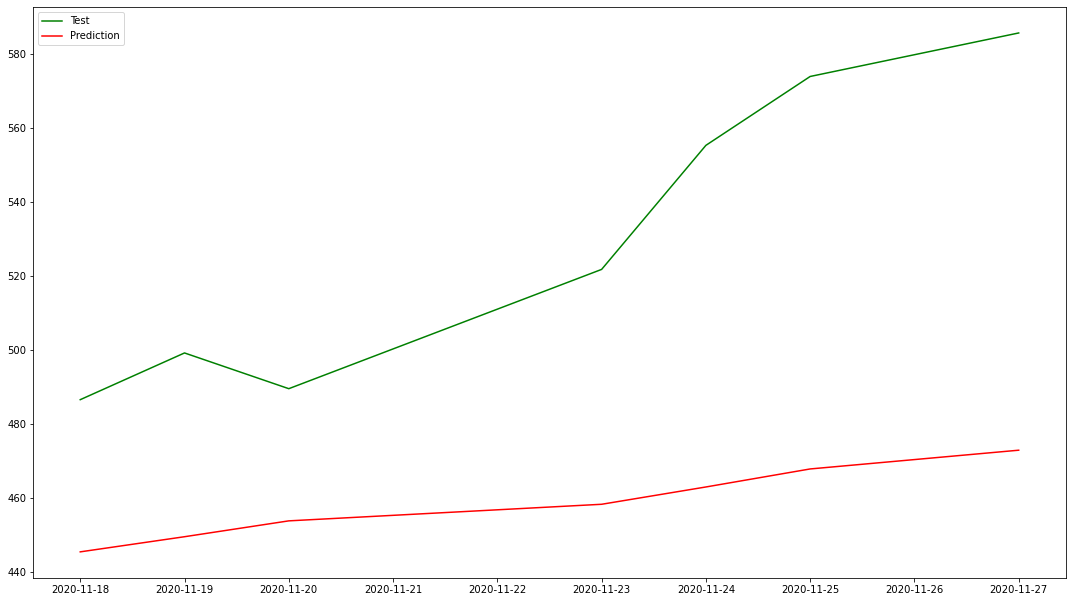

In [437]:
origin_test_value=testSet_origin['Close'].values
origin_test_value_series=pd.Series(origin_test_value, index=testSet_origin.index)


print(yPrediction_series)
tran_origin_test_value_series = {'Date':origin_test_value_series.index,'Close':origin_test_value_series.values}
df_origin_test_value = pd.DataFrame(origin_test_value_series)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df_origin_test_value, color='green', label = "Test")
plt.plot(yPrediction_series, color='red', label = "Prediction")
plt.legend()
plt.savefig("TemperaturePrediction.png")

In [503]:
yPrediction_train = []
baseline=trainSet_origin.iat[1,0]
for fore in forecast_dynamic_false:
    yPrediction_train_element=fore+baseline
    yPrediction_train.append(yPrediction_train_element)
    baseline=yPrediction_train_element
corresponding_train=trainSet_origin
corresponding_train=corresponding_train[2:len(trainSet_origin)]
yPrediction_train_series=pd.Series(yPrediction_train, index=corresponding_train.index)

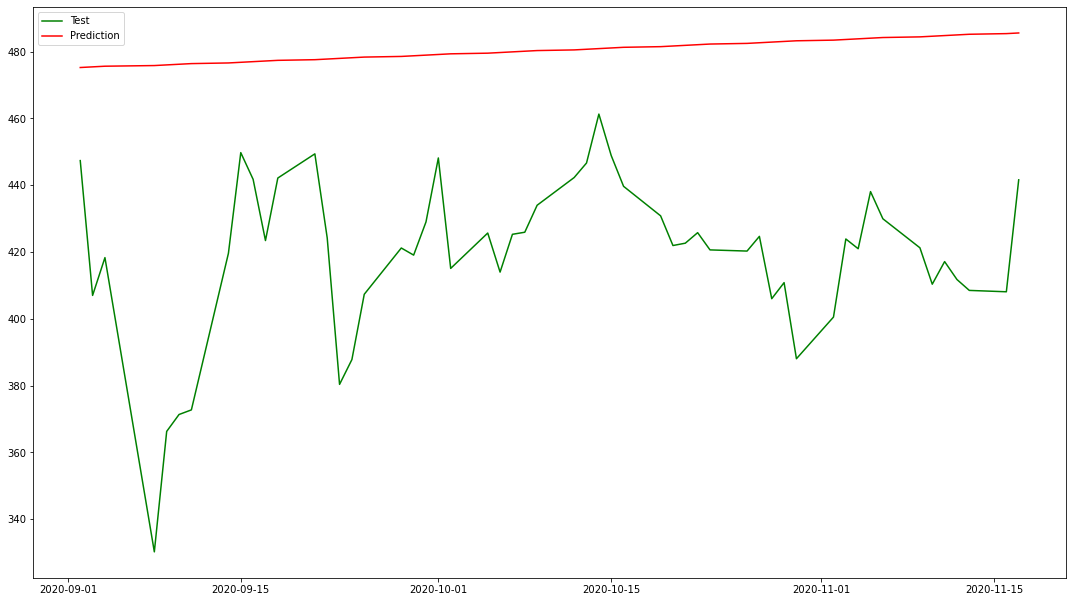

In [504]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(corresponding_train, color='green', label = "Test")
plt.plot(yPrediction_train_series, color='red', label = "Prediction")
plt.legend()
plt.savefig("TemperaturePrediction.png")

In [506]:
residual = []
residual_square = []
for i in range(len(corresponding_train)):
    residual_element=corresponding_train.iat[i,0]-yPrediction_train_series.iat[i]
    residual.append(residual_element)
    residual_square_element=residual_element*residual_element
    residual_square.append(residual_square_element)

residual_series=pd.Series(residual, index=corresponding_train.index)
residual_square_series=pd.Series(residual_square, index=corresponding_train.index)
print(residual_series)

Date
2020-09-02    -27.875200
2020-09-03    -68.440402
2020-09-04    -57.315602
2020-09-08   -145.620825
2020-09-09   -109.746025
2020-09-10   -104.881234
2020-09-11   -103.696437
2020-09-14    -56.991650
2020-09-15    -27.046842
2020-09-16    -35.242050
2020-09-17    -53.767274
2020-09-18    -35.242480
2020-09-21    -28.197666
2020-09-22    -53.552877
2020-09-23    -97.618110
2020-09-24    -90.383294
2020-09-25    -71.028513
2020-09-28    -57.363704
2020-09-29    -59.688916
2020-09-30    -49.944121
2020-10-01    -30.989334
2020-10-02    -64.254549
2020-10-05    -53.859760
2020-10-06    -65.754948
2020-10-07    -54.630179
2020-10-08    -54.205360
2020-10-09    -46.320581
2020-10-12    -38.215800
2020-10-13    -34.061001
2020-10-14    -19.606214
2020-10-15    -32.221404
2020-10-16    -41.626603
2020-10-19    -50.661837
2020-10-20    -59.747028
2020-10-21    -59.242223
2020-10-22    -56.287437
2020-10-23    -61.642647
2020-10-26    -62.187861
2020-10-27    -57.983074
2020-10-28    -76.83

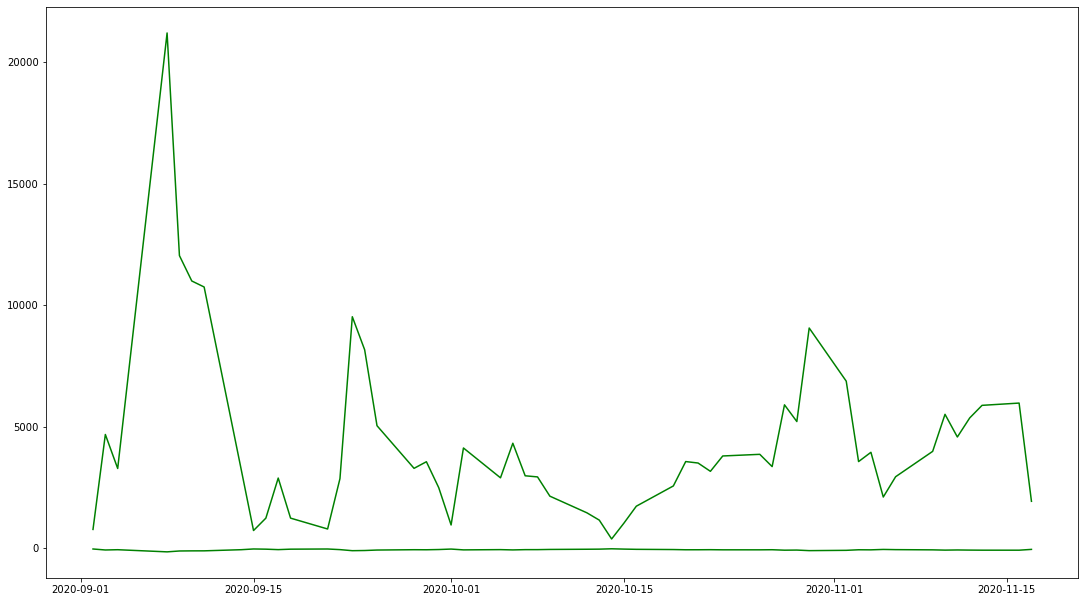

In [507]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(residual_series, color='green', label = "residual")
plt.plot(residual_square_series, color='green', label = "residual square")

plt.savefig("residual and residual square.png")


In [512]:
print(acorr_ljungbox(residual_series, lags=5))
# can view it as white noise

(array([18.55308327, 24.72766919, 24.73457397, 26.02928316, 30.69758028]), array([1.65237733e-05, 4.27026534e-06, 1.75447493e-05, 3.12172738e-05,
       1.07471912e-05]))


In [511]:
print(acorr_ljungbox(residual_square_series, lags=5))

(array([14.87055413, 20.49122461, 20.56492998, 21.77124617, 24.64532534]), array([1.15146447e-04, 3.55129796e-05, 1.29611356e-04, 2.22564512e-04,
       1.63110570e-04]))


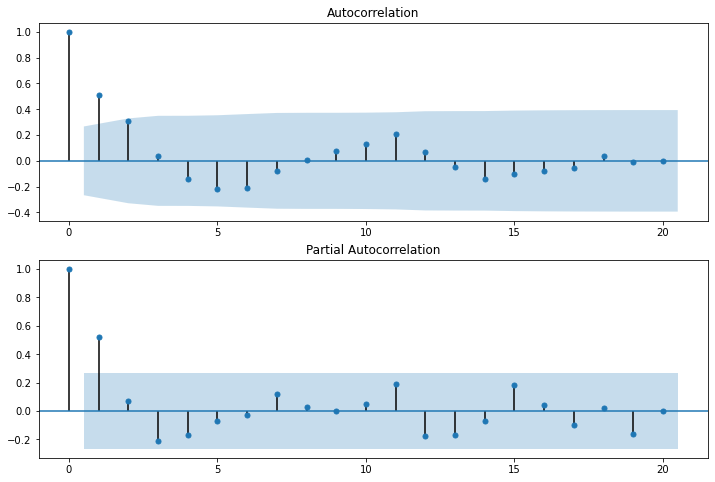

In [515]:
autocorrelation(residual_square_series, 20)

In [516]:
isSeriesStationaryAvg(residual_square_series)


False

In [525]:
residual_square_series_scale=residual_square_series*0.001
print(residual_square_series_scale)

Date
2020-09-02     0.777027
2020-09-03     4.684089
2020-09-04     3.285078
2020-09-08    21.205425
2020-09-09    12.044190
2020-09-10    11.000073
2020-09-11    10.752951
2020-09-14     3.248048
2020-09-15     0.731532
2020-09-16     1.242002
2020-09-17     2.890920
2020-09-18     1.242032
2020-09-21     0.795108
2020-09-22     2.867911
2020-09-23     9.529295
2020-09-24     8.169140
2020-09-25     5.045050
2020-09-28     3.290595
2020-09-29     3.562767
2020-09-30     2.494415
2020-10-01     0.960339
2020-10-02     4.128647
2020-10-05     2.900874
2020-10-06     4.323713
2020-10-07     2.984456
2020-10-08     2.938221
2020-10-09     2.145596
2020-10-12     1.460447
2020-10-13     1.160152
2020-10-14     0.384404
2020-10-15     1.038219
2020-10-16     1.732774
2020-10-19     2.566622
2020-10-20     3.569707
2020-10-21     3.509641
2020-10-22     3.168276
2020-10-23     3.799816
2020-10-26     3.867330
2020-10-27     3.362037
2020-10-28     5.904122
2020-10-29     5.216233
2020-10-30 

In [526]:
garch = arch.arch_model(residual_square_series_scale,mean='AR',lags=2,p=2, q=2, vol='GARCH') 
garch_fit=garch.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9645532813.831469
Iteration:      2,   Func. Count:     22,   Neg. LLF: 57957526.8525452
Iteration:      3,   Func. Count:     32,   Neg. LLF: 126303028.87923032
Iteration:      4,   Func. Count:     43,   Neg. LLF: 3245.4436612979944
Iteration:      5,   Func. Count:     53,   Neg. LLF: 1967.6392984688719
Iteration:      6,   Func. Count:     63,   Neg. LLF: 119.50577006708654
Iteration:      7,   Func. Count:     73,   Neg. LLF: 114.9018500763856
Iteration:      8,   Func. Count:     83,   Neg. LLF: 119.51729707967856
Iteration:      9,   Func. Count:     93,   Neg. LLF: 113.86144184274706
Iteration:     10,   Func. Count:    103,   Neg. LLF: 133.99322766092402
Iteration:     11,   Func. Count:    114,   Neg. LLF: 112.57936055838012
Iteration:     12,   Func. Count:    123,   Neg. LLF: 114.17135329176918
Iteration:     13,   Func. Count:    133,   Neg. LLF: 112.25155995531851
Iteration:     14,   Func. Count:    142,   Neg. LLF: 1

In [550]:
def best_garch_model(train_data,p,q,lag):
    best_model_aic = np.Inf 
    best_model_bic = np.Inf 
    best_model_hqic = np.Inf
    best_model_order = (0,0,0)
    models = []
    for p_ in p:
        for q_ in q:
            for lag_ in lag:
                try:
                        no_of_lower_metrics = 0
                        model_temp = arch.arch_model(train_data,mean='AR',lags=lag_,p=p_, q=q_, vol='GARCH')
                        model=model_temp.fit(disp = 0)
                        models.append(model)
                        if model.aic <= best_model_aic: no_of_lower_metrics+=1
                        if model.bic <= best_model_bic: no_of_lower_metrics+=1
                        if no_of_lower_metrics > 1:
                            best_model_aic = np.round(model.aic,0)
                            best_model_bic = np.round(model.bic,0)
                            best_model_order = (p_,q_,lag_)
                            current_best_model = model
                            models.append(model)
                            print("Best model so far: GARCH" +  str(best_model_order) + 
                                  " AIC:{} BIC:{} ".format(best_model_aic,best_model_bic)+
                                  " resid:{}".format(np.round(np.exp(current_best_model.resid).mean(),3)))
                except:
                        pass

    print('\n')
    print(current_best_model.summary()) 
    print(best_model_order)
    return current_best_model, models

In [551]:
garch_best_model,garch_models = best_garch_model(train_data=residual_square_series_scale,p=range(5),q=range(5),lag=range(5))

Iteration:      1,   Func. Count:      5,   Neg. LLF: 147.7065555121437
Iteration:      2,   Func. Count:     10,   Neg. LLF: 145.24574475680865
Iteration:      3,   Func. Count:     15,   Neg. LLF: 145.82093820007037
Iteration:      4,   Func. Count:     20,   Neg. LLF: 143.47882566439438
Iteration:      5,   Func. Count:     25,   Neg. LLF: 143.15983991571878
Iteration:      6,   Func. Count:     29,   Neg. LLF: 143.15413694749284
Iteration:      7,   Func. Count:     33,   Neg. LLF: 143.1537904096732
Iteration:      8,   Func. Count:     37,   Neg. LLF: 143.1536210446096
Iteration:      9,   Func. Count:     41,   Neg. LLF: 143.15358806542045
Iteration:     10,   Func. Count:     44,   Neg. LLF: 143.15358806539032
Best model so far: GARCH(1, 0, 0) AIC:292.0 BIC:298.0  resid:500401.517
Iteration:      1,   Func. Count:      6,   Neg. LLF: 658.8102210089774
Iteration:      2,   Func. Count:     13,   Neg. LLF: 161.82593294541388
Iteration:      3,   Func. Count:     20,   Neg. LLF: 13